## Partie 1 

#### Lire les données du fichier CSV ‘dataset-sell4all.csv’ qui contient les données démographiques et de dépenses des utilisateurs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\Admin\Documents\data-sell4all.xlsx')

####  des informations sur les 5 premières lignes du fichier CSV

In [2]:
df.head()

,Pays,Âge,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30


####  un résumé technique des données disponibles dans le fichier CSV avec desinformations telles que 

##### *  le nombre de lignes

In [3]:
nombre_lignes = len(df)
print(f"Nombre de lignes : {nombre_lignes}")

Nombre de lignes : 65


##### *  le nombre de colonnes

In [4]:
nombre_colonnes = len(df.columns)
print(f"Nombre de colonnes : {nombre_colonnes}")

Nombre de colonnes : 4


##### *  les types de données des colonnes

In [5]:
types_donnees = df.dtypes
print(types_donnees)

Pays                    object
Âge                     object
Genre                   object
Dépenses des clients    object
dtype: object


#### Explication du Résumé Technique

- **Nombre de lignes** : Le résumé affiche le nombre total de lignes dans le DataFrame, correspondant au nombre d'enregistrements dans le fichier CSV.
- **Colonnes** : Les noms des colonnes sont listés, représentant les différentes variables présentes dans les données.
- **Types de données** : Les types de données de chaque colonne sont indiqués (`int64` pour les entiers, `float64` pour les nombres à virgule flottante, `object` pour les chaînes de caractères). Cela aide à comprendre la nature des variables pour choisir les bonnes méthodes d'analyse.
- **Valeurs non nulles** : Le résumé montre également le nombre de valeurs non nulles dans chaque colonne, permettant de repérer les colonnes avec des valeurs manquantes.

#### Calculer la médiane et la moyenne des colonnes

## Partie 2 

###  Explication du code

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Lire les données du fichier CSV
df=pd.read_excel(r'C:\Users\Admin\Downloads\data-sell4all.xlsx')
df

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30
...,...,...,...,...
60,Digital Realm,NaN,AI,1010101.01
61,Multiverse,∞,Non-Binary,π
62,Error,NaN,404,NaN
63,"Greece, Italy",25;30,Male;Female,100+200


#### 1: Supprimer les lignes avec des valeurs nulles et  les doublons

In [16]:
df2=df_cleaned = df.drop_duplicates()
df2=df_cleaned = df_cleaned.dropna()
df2=df2.drop([55,56,58,59,61,63,64])
print(df2)

         Pays  Age       Genre Dépenses des clients
0      France    32     Female               150.50
1     Germany    45       Male               200.75
2       Spain    28     Female                75.25
3       Italy    39       Male               180.00
4          UK    52     Female               250.30
5      France    22       Male                90.00
6     Germany    36     Female               175.50
7       Spain    41       Male               120.75
8       Italy    29     Female                95.25
9          UK    48       Male               220.00
10     France    35     Female               160.25
11    Germany    27       Male                85.50
12      Spain    50     Female               190.75
13      Italy    33       Male               140.00
14         UK    44     Female               210.50
15     France    31       Male               130.25
16    Germany    38     Female               170.00
17      Spain    26       Male                 5.75
18      Ital

#### 2: Vérifier et convertir les types de données si nécessaire

##### - Assurez-vous que 'Pays' est de type chaîne

In [17]:
df2['Pays'] = df2['Pays'].astype(str)

##### - Convertir en numérique

In [18]:
df2['Dépenses des clients'] = pd.to_numeric(df2['Dépenses des clients'], errors='coerce')

#### 3: Calculer les dépenses totales par pays

In [19]:
expenses_by_country = df2.groupby('Pays')['Dépenses des clients'].sum().reset_index()

###  une visualisation des données du graphique à barres qui montre les dépensesdes clients par pays

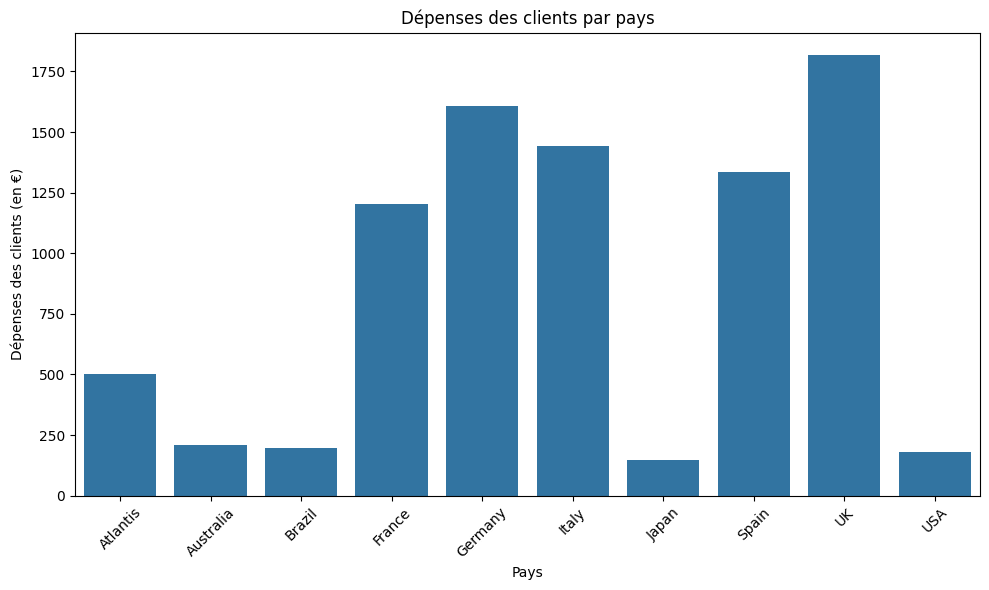

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pays', y='Dépenses des clients', data=expenses_by_country)
plt.title('Dépenses des clients par pays')
plt.xlabel('Pays')
plt.ylabel('Dépenses des clients (en €)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Filtrer les données pour conserver uniquement les lignes avec des dépenses de 10 € ou plus

In [21]:
df2_cleaned = df2[df2['Dépenses des clients'] >= 10].copy()

### supprimer toutes les lignes qui apparaissent plus d’une fois dans les données

In [22]:
df2_cleaned = df2_cleaned.drop_duplicates()
print(df2_cleaned )

         Pays  Age       Genre  Dépenses des clients
0      France    32     Female                150.50
1     Germany    45       Male                200.75
2       Spain    28     Female                 75.25
3       Italy    39       Male                180.00
4          UK    52     Female                250.30
5      France    22       Male                 90.00
6     Germany    36     Female                175.50
7       Spain    41       Male                120.75
8       Italy    29     Female                 95.25
9          UK    48       Male                220.00
10     France    35     Female                160.25
11    Germany    27       Male                 85.50
12      Spain    50     Female                190.75
13      Italy    33       Male                140.00
14         UK    44     Female                210.50
15     France    31       Male                130.25
16    Germany    38     Female                170.00
18      Italy    47     Female                

###  les données nettoyées dans un nouveau fichier CSV (df3)

In [23]:
df3 = df2_cleaned.drop_duplicates()
print(df3 )

         Pays  Age       Genre  Dépenses des clients
0      France    32     Female                150.50
1     Germany    45       Male                200.75
2       Spain    28     Female                 75.25
3       Italy    39       Male                180.00
4          UK    52     Female                250.30
5      France    22       Male                 90.00
6     Germany    36     Female                175.50
7       Spain    41       Male                120.75
8       Italy    29     Female                 95.25
9          UK    48       Male                220.00
10     France    35     Female                160.25
11    Germany    27       Male                 85.50
12      Spain    50     Female                190.75
13      Italy    33       Male                140.00
14         UK    44     Female                210.50
15     France    31       Male                130.25
16    Germany    38     Female                170.00
18      Italy    47     Female                